In [12]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math
img = cv2.imread('formas.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(img)


In [13]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img_gray,50,150)
circles=cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,dp=100,minDist=50,param1=10,param2=30,minRadius=50,maxRadius=150)

bordas_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
output = bordas_rgb


if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # desenha o contorno do circulo
        cv2.circle(output,(i[0],i[1]),i[2],(0,255,0),2)
        # desenha no centro do circulo
        cv2.circle(output,(i[0],i[1]),2,(0,0,255),3)

plt.figure(figsize = (10,10))
plt.imshow(output, cmap="gray")

In [14]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img_gray,50,150)
circles=cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,dp=1,minDist=10,param1=30,param2=30,minRadius=50,maxRadius=120)

bordas_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
output = bordas_rgb


if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # desenha o contorno do circulo
        cv2.circle(output,(i[0],i[1]),i[2],(0,255,0),10)
        # desenha no centro do circulo
        cv2.circle(output,(i[0],i[1]),5,(255,255,255),10)


plt.imshow(output, cmap="gray")

In [15]:


img = cv2.imread('coins.png',0)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,param1=50,
                           param2=40,minRadius=45,maxRadius=60)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)


plt.imshow(cimg)

In [16]:
img = cv2.imread('coins.png',0)
img = cv2.medianBlur(img,9)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=40,
                           minRadius=75,maxRadius=90)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)


plt.imshow(cimg)

Quantidade de moedas de 1 dólar: 4


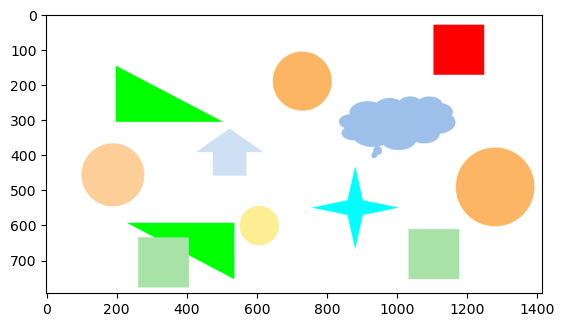

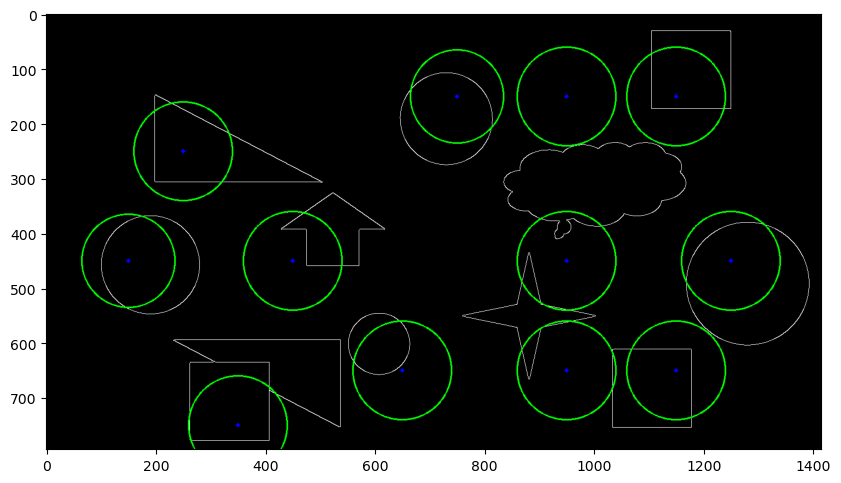

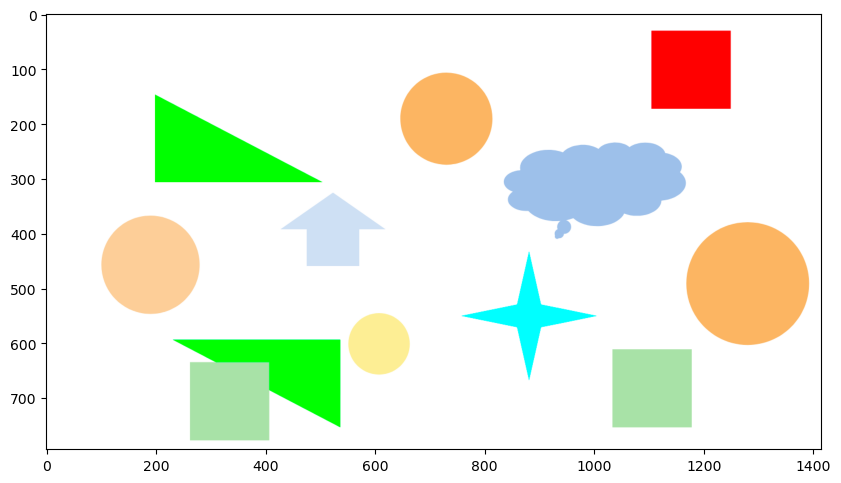

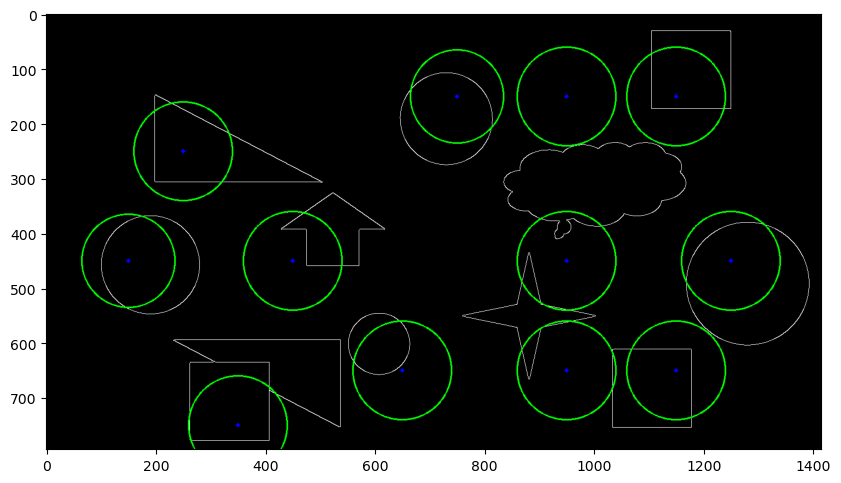

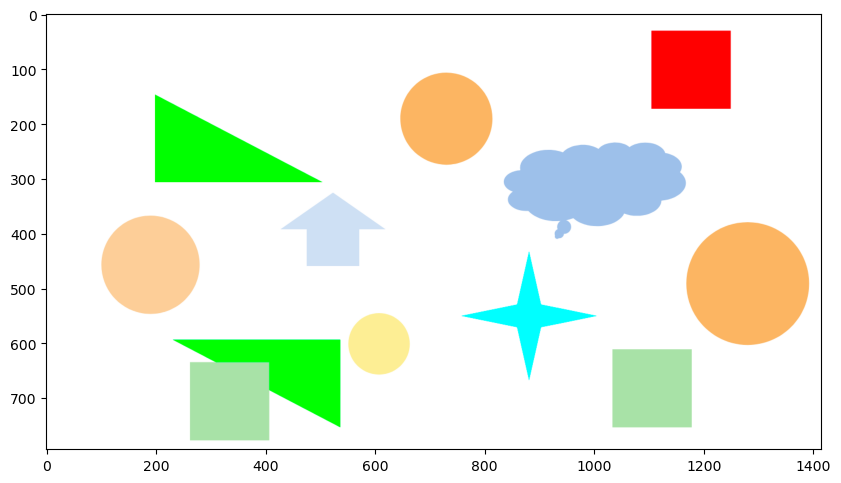

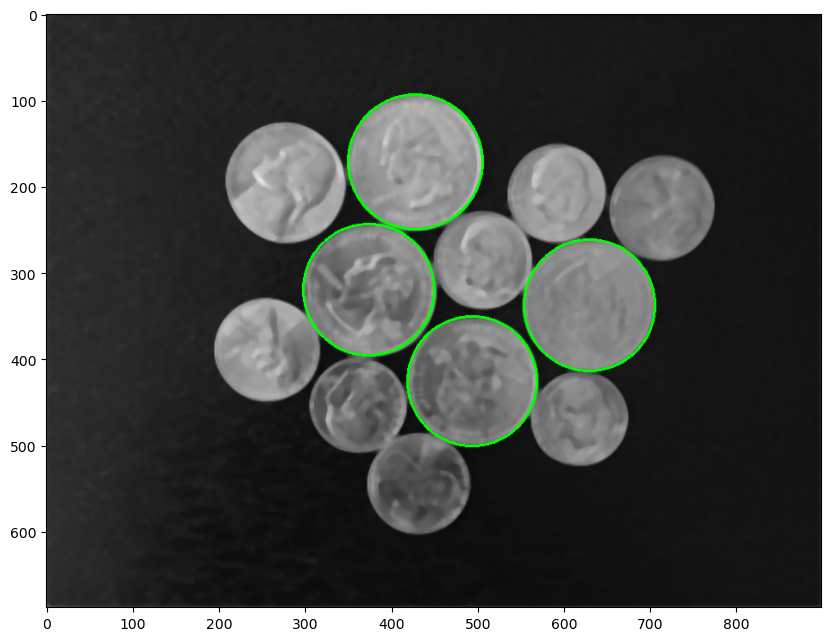

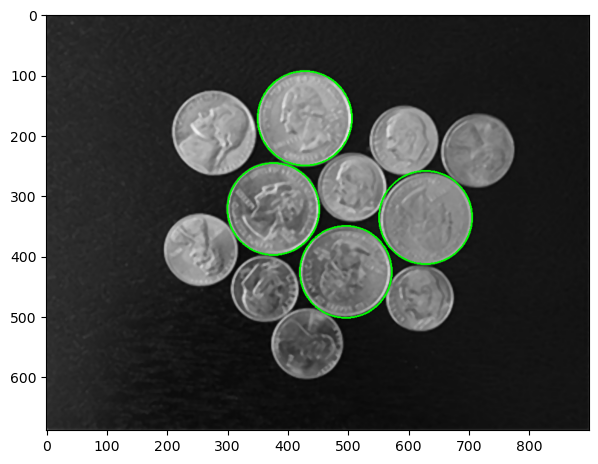

In [17]:



# Carregar a imagem
img = cv2.imread('coins.png', 0)
img = cv2.medianBlur(img, 5)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

# Detectar círculos
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=40, minRadius=75, maxRadius=90)

if circles is not None:
    # Converter para inteiros
    circles = np.uint16(np.around(circles))

    # Contador de moedas de 1 dólar
    dollar_coins_count = 0

    for i in circles[0, :]:
        # Verificar se o raio está na faixa esperada para uma moeda de 1 dólar
        if 75 <= i[2] <= 90:
            dollar_coins_count += 1
            cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)

    # Exibir a quantidade de moedas de 1 dólar
    print("Quantidade de moedas de 1 dólar:", dollar_coins_count)

    # Exibir a imagem com as moedas de 1 dólar detectadas
    plt.figure(figsize=(7, 7))
    plt.imshow(cimg)
    plt.show()
else:
    print("Nenhuma moeda detectada.")



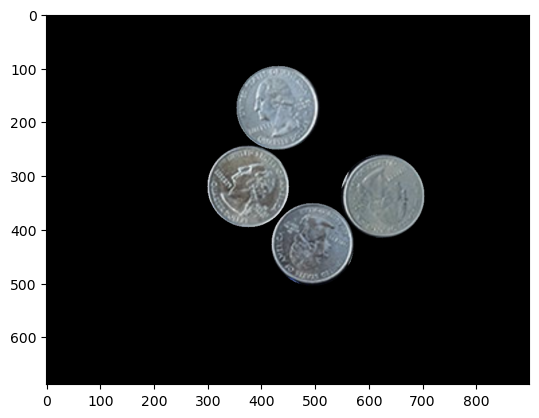

In [18]:


# Carregar a imagem
img = cv2.imread('coins.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_copy = img.copy()

# Detectar círculos
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=40, minRadius=75, maxRadius=90)

if circles is not None:
    # Converter para inteiros
    circles = np.uint16(np.around(circles))

    # Criar uma máscara para as moedas
    mask = np.zeros_like(gray)
    for i in circles[0, :]:
        cv2.circle(mask, (i[0], i[1]), i[2], 255, -1)

    # Segmentar as moedas contornadas
    segmented_coins = cv2.bitwise_and(img_copy, img_copy, mask=mask)

    # Exibir as moedas segmentadas

    plt.imshow(segmented_coins)

    plt.show()
else:
    print("Nenhuma moeda detectada.")


Quantidade de moedas: 4


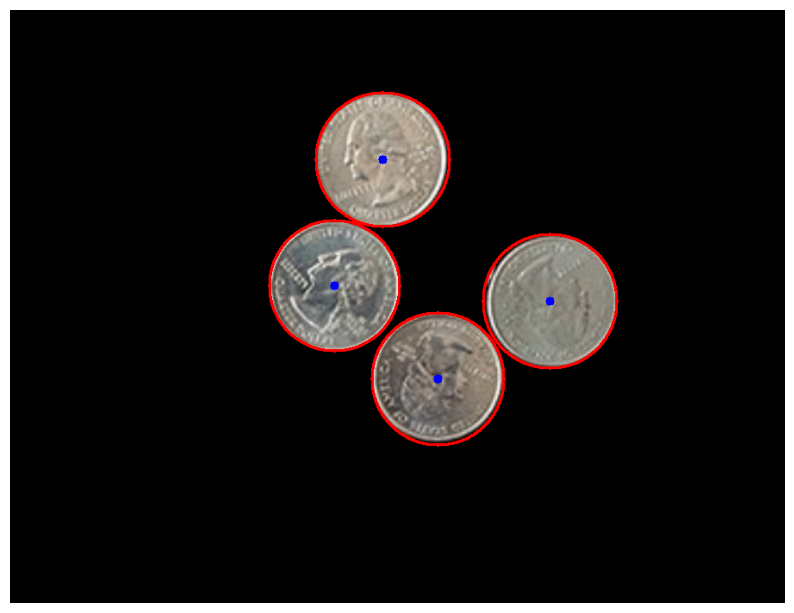

In [19]:


# Carregar a imagem
img = cv2.imread('coins.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_copy = img.copy()

# Detectar círculos
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=40, minRadius=75, maxRadius=90)

if circles is not None:
    # Converter para inteiros
    circles = np.uint16(np.around(circles))

    # Criar uma máscara para as moedas
    mask = np.zeros_like(gray)
    for i in circles[0, :]:
        cv2.circle(mask, (i[0], i[1]), i[2], 255, -1)

    # Segmentar as moedas contornadas
    segmented_coins = cv2.bitwise_and(img_copy, img_copy, mask=mask)

    # Encontrar contornos
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Desenhar contornos nas moedas segmentadas
    cv2.drawContours(segmented_coins, contours, -1, (0, 0, 255), 2)

    # Adicionar centro de massa de cada moeda
    for cnt in contours:
        # Calcular momentos do contorno
        M = cv2.moments(cnt)
        # Calcular coordenadas do centro de massa
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        # Desenhar marcador no centro de massa
        cv2.circle(segmented_coins, (cx, cy), 5, (255, 0, 0), -1)

    # Exibir a quantidade de moedas
    print("Quantidade de moedas:", len(contours))

    # Exibir as moedas segmentadas com contornos e centro de massa
    plt.figure(figsize=(10, 10))
    plt.imshow(segmented_coins[:,:,::-1])
    plt.axis('off')
    plt.show()
else:
    print("Nenhuma moeda detectada.")


### **DETECÇÃO DE RETAS**

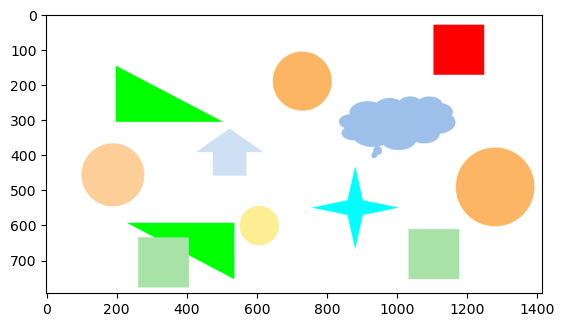

In [20]:
img = cv2.imread('formas.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(img)
plt.show()
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img_gray,50,150)

lines = cv2.HoughLinesP(edges, 1, math.pi/180.0, 100, np.array([]), 180, 5)

hough_img = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(hough_img, (x1, y1), (x2, y2), (255, 0, 255), 5)


plt.imshow(hough_img)


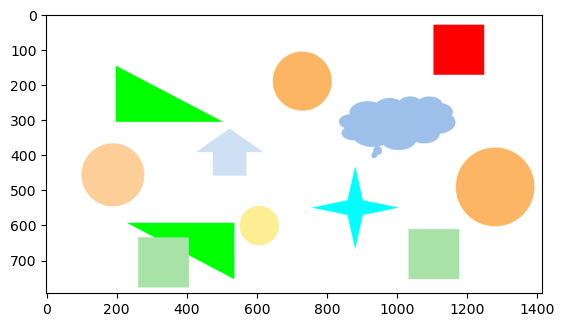

In [21]:
img = cv2.imread('formas.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(img)
plt.show()
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img_gray,50,150)

lines = cv2.HoughLinesP(edges, 1, math.pi/180.0, 50, np.array([]), 30, 5)

hough_img = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(hough_img, (x1, y1), (x2, y2), (255, 0, 255), 5)



plt.imshow(hough_img)

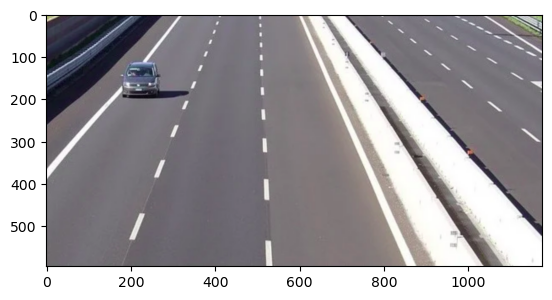

In [22]:
img = cv2.imread('rua.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img_gray,50,200)
#rho (ρ) e theta (θ).
#Limiar de linhas min
#comprimento mínimo de linha, lacuna máxima permitida entre segmentos de linha.
lines = cv2.HoughLinesP(edges, 1, math.pi/180.0, 99, np.array([]), 3, 120)

hough_img = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(hough_img, (x1, y1), (x2, y2), (255, 0, 255), 5)

plt.imshow(hough_img)

## **MORFOLOGIA MATEMÁTICA**

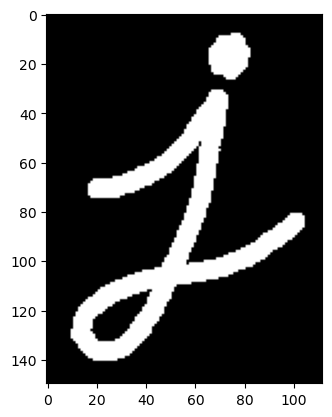

In [23]:

img = cv2.imread('j.png',0)
plt.imshow(img, cmap="gray")
plt.show()

kernel = np.ones((7,7),np.uint8)

dilation = cv2.dilate(img,kernel,iterations = 2)


plt.imshow(dilation, cmap="gray")

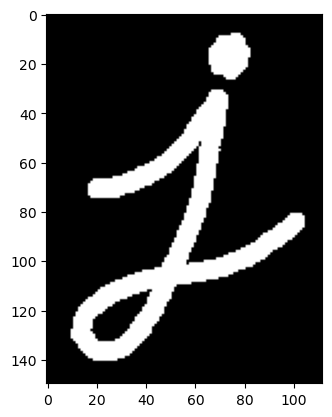

In [24]:

img = cv2.imread('j.png',0)

plt.imshow(img, cmap="gray")
plt.show()

dst = img.copy()
kernel = np.ones((5,5),np.uint8)

dilation = cv2.dilate(img,kernel,iterations = 1)

dst = dilation - img


plt.imshow(dst, cmap="gray")

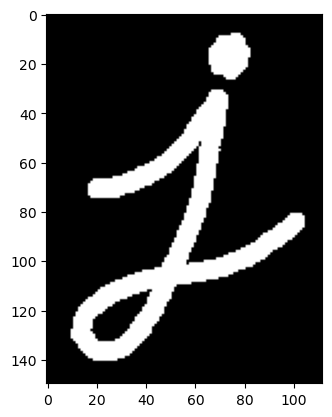

In [25]:

img = cv2.imread('j.png',0)
plt.imshow(img, cmap="gray")
plt.show()

dst = img.copy()
kernel = np.ones((6,6),np.uint8)

erode = cv2.erode(img,kernel,iterations = 1)

plt.imshow(erode, cmap="gray")

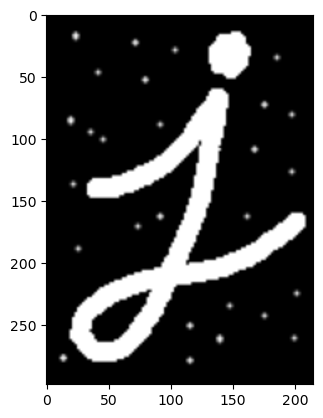

In [26]:

img = cv2.imread('j-noise.png',0)
plt.imshow(img, cmap="gray")
plt.show()

dst = img.copy()
kernel = np.ones((7,7),np.uint8)

opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

plt.imshow(opening, cmap="gray")

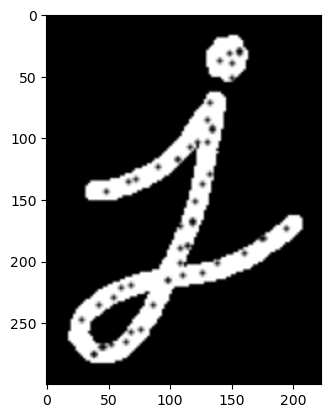

In [27]:

img = cv2.imread('holes.png',0)
plt.imshow(img, cmap="gray")
plt.show()

dst = img.copy()
kernel = np.ones((7,7),np.uint8)

closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

plt.imshow(closing, cmap="gray")

In [28]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

img = cv2.imread('xadrez.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (10,10))
plt.imshow(img); plt.show()
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img_gray,50,200)
#rho (ρ) e theta (θ).
#Limiar de linhas min
#comprimento mínimo de linha, lacuna máxima permitida entre segmentos de linha.
lines = cv2.HoughLinesP(edges, 1, math.pi/180.0, 99, np.array([]), 3, 120)


hough_img = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(hough_img, (x1, y1), (x2, y2), (255, 0, 255), 5)


plt.figure(figsize = (10,10))
plt.imshow(hough_img)

error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
